In [73]:
import math

import random

import matplotlib.pyplot as plt

import numpy as np

import pylab

%matplotlib inline

In [74]:
i = 1
Garray = [0]
N = 100     #Number of trials

a1 = 1.6  #length of detector 1
a2 = 1.6  #length of detector 2
b1 = 1.6  #width of detector 1
b2 = 1.6  #width of detector 2
l = 2.3   #space in between the detectors

for i in range(1,N):
    #N = 10000 #Sample Size

    z = 0       #array variable

    phi = []  #Values of phi

    cos = []  #Values of Cos(theta)

    theta = []    #Values of theta

    I = []

    for z in range(0, i):
        k = random.uniform(0,6.2831853071796)
        phi.append(k)
        I.append(z)
        z = z + 1
    #print(I)


    for z in range(0, i):
        k = random.uniform(0,1)
        cos.append(k)
        theta.append(math.acos(k))
        z = z + 1
    
    #print(phi)
    #print(theta)

    #plt.hist(phi)
    

    z = 0     #loop variable 
    A = []    #Directional Response Variable
    for z in range(0,i):
    
    #The following for loop calculates Directional Response for all values of phi and and theta created above. All of which is 
    #dictated by the fact that the fact that both detectors are taken to be square and identical. An array, A, is made based on 
    #full of all the possible values
    
    
        alpha = (1/2) * (a1 + a2)
        beta = (1/2) * (b1 + b2)
        gamma = (1/2) * (a1 - a2)
        delta = (1/2) * (b1 - b2)
        zeta = (-l*(math.tan(theta[z]))*(math.cos(phi[z])))
        nu = (-l*(math.tan(theta[z]))*(math.sin(phi[z])))
        j = gamma + zeta
        k = gamma - zeta
        m = delta + nu
        n = delta - nu
        if j > 0:
            Hj = 1
        else:
            Hj = 0
        if k > 0:
            Hk = 1
        else:
            Hk = 0
    
        if m > 0:
            Hm = 1
        else:
            Hm = 0
        if n > 0:
            Hn = 1
        else:
            Hn = 0
    
        X = a2-j*Hj-k*Hk
        Y = b2-m*Hm-n*Hn


        if X > 0:
            HX = 1
        else:
            HX = 0
        if Y > 0:
            HY = 1
        else:
            HY = 0

        U = X*HX*Y*HY
        A.append(U)
        z = z + 1

    z = 0

    Apos = []
    #print(Apos)
    for z in range(0,len(A)):
    
    #This for loop takes all non zero values of A and creates a new array, Apos, of only those directional response numbers    
    
        if A[z] > 0:
            Apos.append(A[z])
            z = z + 1
            
    A1 = a1 * b1
    A2 = a2 * b2

    MaxG = A1*A2/pow(l,2)
    MinG = MaxG*(1-((pow(a1,2)+pow(a2,2)+pow(b1,2)+pow(b2,2))/(6*pow(l,2))))

    #print('Because our two detectors are both square and identical we can approximate G to be within the range:')
    #print(MaxG,'>= G >=',MinG)           
    
    
    
    dw = (abs(0-6.2831853)*abs(0-1))/i
    z = 0
    G = 0
    
    for z in range(0,i):
        G = G + (A[z]*dw)
        z = z + 1
    Garray.append(G)
    i = i + 10
#print(Garray)
print(dw)

0.06346651818181819


1.2388657844990556


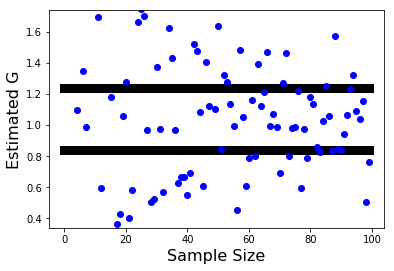

In [75]:
x = np.arange(0,N)
y_max = MaxG + 0*x
y_min = MinG + 0*x
plt.plot(x, y_max, 'k', lw = 9)
plt.plot(x, y_min, 'k', lw = 9)
plt.plot(x, Garray, 'ob')
pylab.ylim(MinG - 0.5, MaxG + 0.5)
plt.xlabel('Sample Size', fontsize = 16)
plt.ylabel('Estimated G', fontsize = 16)
print(MaxG)


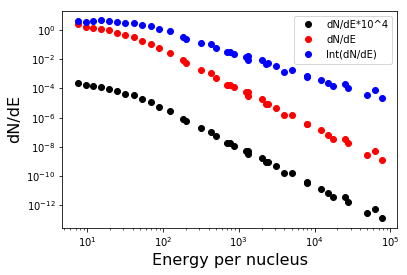

In [103]:
Cmin4 = [7.446865864702971,0.00025550970903525017,
9.538399238314735,0.00016967959918688967,
11.84512684125444,0.0001480370323566661,
15.171959706685165,0.00012915496650148773,
19.433169811198148,0.00009830884473994768,
24.891187177649897,0.00006528521141127821,
31.882148158648913,0.00004335478501746005,
40.83659666191982,0.000033000347911252754,
52.3059995402453,0.000019119717955004944,
69.10209531794115,0.000011077568505097042,
88.51017130182889,0.000005599485806609278,
124.39656355081672,0.000002830426305555396,
185.99406072433072,8.289312615337137e-7,
204.08557677855228,5.504789807854945e-7,
314.7318915713827,1.847849797422287e-7,
428.8626335482619,1.070605893154232e-7,
500.6185480419776,5.4116952654646267e-8,
703.5940176169865,1.8165997883753213e-8,
772.0321301878924,1.8165997883753213e-8,
873.7483277008978,1.206372646810021e-8,
1228.0090273875533,5.320175096324741e-9,
1306.4026439427787,5.320175096324741e-9,
1306.4026439427787,3.0823992397451183e-9,
2014.677282795501,1.7858782655001199e-9,
2280.1135313774284,9.027251779484541e-10,
2425.671374923132,9.027251779484541e-10,
3106.947595851656,4.5630923599031475e-10,
3979.5676624473854,1.5317404637020734e-10,
5097.272577478355,1.5317404637020734e-10,
7860.79185745426,3.414548873833587e-11,
7860.79185745426,3.913745601980376e-11,
12122.57098026098,1.3137675134229727e-11,
15054.244146806324,6.640827850634797e-12,
17573.07178825481,3.356803550946693e-12,
25474.204488304742,3.356803550946693e-12,
27952.063069777178,1.6967959918688898e-12,
48785.78402364723,2.8791166380223293e-13,
62487.802738247054,4.969312358864732e-13,
77599.59831547152,1.2697075549188058e-13]

x = []
y = []
J = 1

x.append(Cmin4[0])
y.append(Cmin4[1])

for i in range (2,len(Cmin4)):
    if (i%2) == 0:
        x.append(Cmin4[i])
        J = J + 1
    else:
        y.append(Cmin4[i])

plt.loglog(x, y, 'ok', label='dN/dE*10^4')
plt.xlabel('Energy per nucleus',fontsize=16)
plt.ylabel('dN/dE', fontsize=16)
#plt.title('Carbon * 10^-4')

ty = []

for i in range(0,len(x)):          #The following for loop multiplies Carbon Flux by 10^4 in order to view original values
    j = y[i]*math.pow(10,4)
    ty.append(j)

plt.loglog(x,ty,'or', label='dN/dE')

dlogE = abs(5-1)/len(x)

iy = []

for i in range(0,len(x)):
    j = x[i]*ty[i]*2.3*dlogE
    iy.append(j)

plt.loglog(x,iy,'ob', label= 'Int(dN/dE)')

plt.legend(loc = 'upper right')

plt.show()


#print(ty)
#print(len(ty))
#print(len(x))
